# The Information Catastrophe 

## Synopsis (tl;dr)

1. The rate of advancement in computing over the last 70 years is staggering, and begs the question of **limits**. 
2. The present rate of "digital content production" (**DCP**) is an estimated $2 \times 10^{19}$ **bits per day**.
3. There is a **physical dimension** to the size of a computational bit, and a theoretical lower limit.
4. There is an **energy requirement** to create one bit of information, and a theoretical lower limit.
5. There is a **mass-energy equivalence** principle (Vopson 2019).
6. The estimated current **growth rate** of DCP is "double digit", accounting for data being erased.
7. Assuming theoretical limits of computational efficiency, **how long until**:
    * the energy requirements of DCP exceeds the present power requirement of the earth?
    * the mass of DCP exceeds the mass of the earth?


## The Growth Model

>"The total number of bits of information accumulated on the planet after $n$ years of $f\%$ growth:"

$$N_{bits}(n) = \frac{N_b}{f} \cdot \left( \left( f + 1  \right)^{n+1} -1 \right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bits_estimation(n, f=0.01, N_b=7.3E21):
    """
    Total number of bits of information accumulated on the planet after n years of f% growth.
    
    n   = number of years elapsed 
    f   = rate of growth of digital bit production (%, 0 --> 1)
    N_b = estimated current annual rate of digital bit production (7.3 x 10^21)
    
    Returns: annual information production as a bitrate, expressed as log10(bits/year)
    """
    try:
        bits = (N_b/f) * ((f + 1)**(n + 1) - 1)
        return np.log10(bits)
    except OverflowError as e:
        return np.nan
    

In [3]:
years = list(range(1,10001))
growth_rates = [0.01, 0.05, 0.2, 0.5]

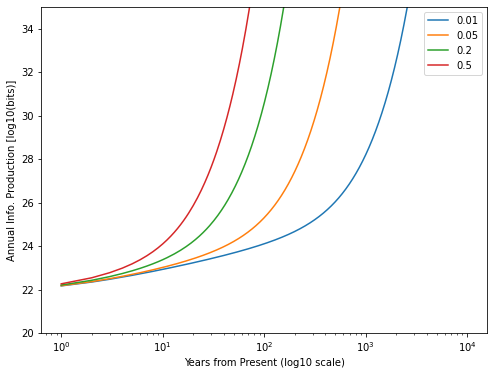

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# evaluate a range of digital content growth rates
for f in growth_rates:
    bits = [bits_estimation(y, f) for y in years]
    
    ax.plot(years, bits, label=f)
    
ax.set_xscale('log',base=10) 
# ax.set_yscale('log',base=10) 
ax.set_ylabel('Annual Info. Production [log10(bits)]')
ax.set_xlabel('Years from Present (log10 scale)')
ax.set_ylim(20, 35)
ax.legend()
plt.show()  

## The Energy Model

>"The total energy necessary to create all the digital information in a given n-th year, assuming $f\%$ year-on-year growth."

$$Q_{info}(n^{th}) = N_b \cdot k_B T \cdot ln(2) \cdot (f + 1)^n$$

In [30]:
def energy_requirement(n, f=0.01, N_b=7.3E21, T=300):
    """
    The total energy necessary to create all the digital information in a given n-th year, 
    assuming 𝑓% year-on-year growth.
    
    n   = nth year from current year
    f   = rate of growth of digital bit production (%, 0 --> 1)
    N_b = estimated current annual rate of digital bit production (7.3 x 10^21)
    k_B = Boltzmann constant (1.38064852 × 10-23 m2 kg s-2 K-1)
    T = temperature at which information is stored (assumed to be 300K in the study)
    """
    k_B = 1.38064852E-23 
    annual_seconds = 3.154E7   # number of seconds in a year
    
    try:
        energy = N_b * k_B * T * np.log(2) * (f + 1)**(n)
        return np.log10(energy / annual_seconds)
    except OverflowError as e:
        return np.nan
        

<ipython-input-30-cc597e31d9c7>:16: RuntimeWarning: overflow encountered in double_scalars
  energy = N_b * k_B * T * np.log(2) * (f + 1)**(n)


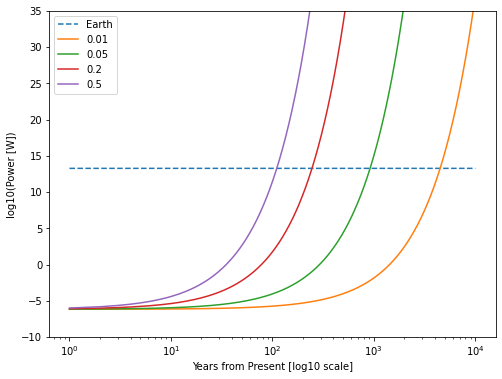

In [31]:
# evaluate a range of energy growth rates
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# plot the total current power use on earth
p_earth = np.log10(18.5E12) 
ax.plot(years, [p_earth for y in years], label='Earth', linestyle='dashed')

# plot the information mass for the range of growth rates
for f in growth_rates:
    bits = [energy_requirement(y, f) for y in years]
    
    ax.plot(years, bits, label=f)
    
# ax.set_yscale('log',base=10) 
ax.set_xscale('log',base=10) 
ax.set_ylabel('log10(Power [W])')
ax.set_xlabel('Years from Present [log10 scale]')
ax.set_ylim(-10, 35)
ax.legend()
plt.show()  

## The Information Mass Model

>"The total information mass accumulated on the planet after $n$ years of $f\%$ growth."

$$M_{info}(n) = N_b \cdot \frac{k_B T \cdot ln(2)}{f\cdot c^2} \cdot \left((f + 1)^{n+1} -1 \right)$$

In [10]:
def mass_energy_equivalent(n, f=0.01, N_b=7.3E21, T=300):
    """
    The growth rate of 'rest mass' corresponding to information production.
    
    n   = nth year from current year
    f   = rate of growth of digital bit production (%, 0 --> 1)
    N_b = estimated current annual rate of digital bit production (7.3 x 10^21)
    k_B = Boltzmann constant (1.38064852 × 10-23 m^2 kg s^-2 K^-1)
    T = temperature at which information is stored (assumed to be 300K in the study)
    c = speed of light 3.0 x 10^8 [m/s]
    """
    k_B = 1.38064852E-23     
    c = 3.0E8                
    
    try: 
        # [kg] mass of a digital bit of information at room temperature
        m_bit = k_B * T * np.log(2) / c**2       
        info_mass = N_b * (m_bit / f) * ((f + 1)**(n+1) - 1)    
        return np.log10(info_mass)
    except OverflowError:
        return np.nan   

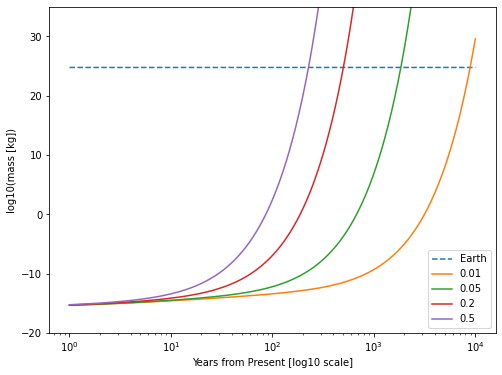

In [25]:
# evaluate a range of mass-energy equivalent growth rates
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# plot the earth's mass [log10(kg)]
m_earth = np.log10(6E24) 
ax.plot(years, [m_earth for y in years], label='Earth', linestyle='dashed')

# plot the information mass for the range of growth rates
for f in growth_rates:
    bits = [mass_energy_equivalent(y, f) for y in years]
    
    ax.plot(years, bits, label=f)
    
# ax.set_yscale('log',base=10) 
ax.set_xscale('log',base=10) 
ax.set_ylabel('log10(mass [kg])')
ax.set_xlabel('Years from Present [log10 scale]')
ax.set_ylim(-20, 35)
ax.legend()
plt.show()  